### Question 3

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.cluster import KMeans
from scipy.stats import multivariate_normal

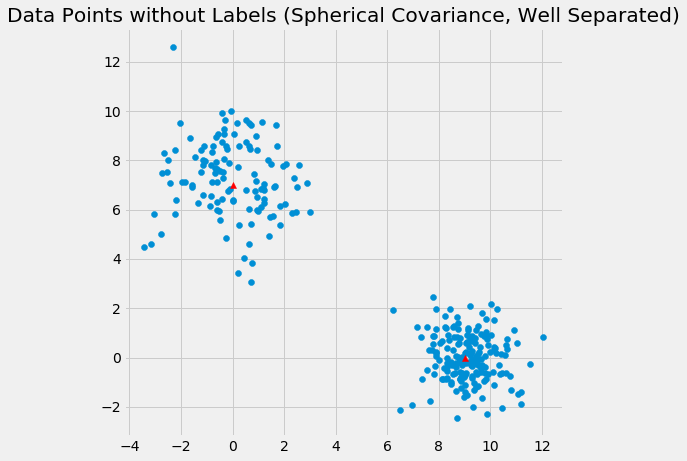

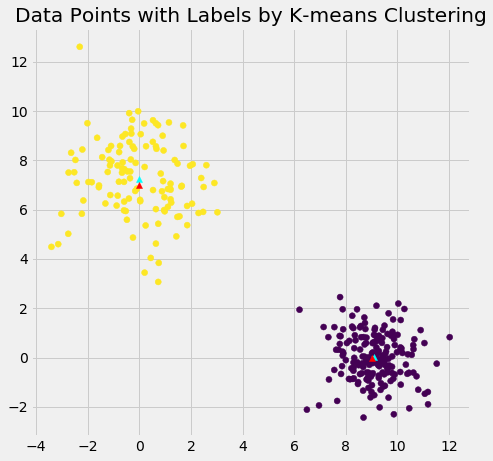

In [2]:
# generate data x with spherical covariance, well separated
N = 300
mu1 = np.array([9,0])
sigma1 = np.array([[1, 0],[0, 1]])
mu2 = np.array([0, 7])
sigma2 = np.array([[2, 0], [0, 2]])
weights = [0.6, 0.4]


np.random.seed(1) #For reproducibility
r1 = np.random.multivariate_normal(mu1, sigma1,int(weights[0]*N))
r2 = np.random.multivariate_normal(mu2, sigma2,int(weights[1]*N))

X = np.vstack((r1,r2)) #Cascade data points
np.random.shuffle(X)

plt.style.use('fivethirtyeight')
plt.figure(figsize=(7, 7))
plt.scatter(X[:,0], X[:,1])
plt.scatter(mu1[0],mu1[1], marker='^', c='red')
plt.scatter(mu2[0],mu2[1], marker='^', c='red')
plt.title('Data Points without Labels (Spherical Covariance, Well Separated)')
plt.show()

kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

plt.figure(figsize=(7, 7))
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_.astype(float))
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], marker='^', c='cyan')
# uncomment below to plot the mean values from each distribution
plt.scatter(mu1[0],mu1[1], marker='^', c='red')
plt.scatter(mu2[0],mu2[1], marker='^', c='red')

plt.title('Data Points with Labels by K-means Clustering')
plt.show()


In [3]:
# initialization

w = np.array([0.5, 0.5])
u1 = np.array(kmeans.cluster_centers_[0])
u2 = np.array(kmeans.cluster_centers_[1])
cov1 = np.eye(2)          
cov2 = np.eye(2)
L_before = 0
gamma1 = np.empty(300)
gamma2 = np.empty(300)
gamma1_x_sum = np.empty(300)
gamma2_x_sum = np.empty(300)

for k in range(0,N):
    L_before += (np.log(w[0]*multivariate_normal.pdf(X[k], u1, cov1)) \
                +np.log(w[1]*multivariate_normal.pdf(X[k], u2, cov2) ) )

L_before = L_before / N
L_after = 0
iterations = 0
threshold = 1e-4

while np.abs(L_after - L_before) > threshold :
    
    iterations += 1
    L_before = L_after
    #for loop in range(0,5):   
    # E Step
    for i in range(0,N):
        gamma1[i] = (w[0]*multivariate_normal.pdf(X[i], u1, cov1)) / \
        (w[0]*multivariate_normal.pdf(X[i], u1, cov1) + w[1]*multivariate_normal.pdf(X[i], u2, cov2))
        
        
        gamma2[i] = (w[1]*multivariate_normal.pdf(X[i], u2, cov2)) / \
        (w[0]*multivariate_normal.pdf(X[i], u1, cov1) + w[1]*multivariate_normal.pdf(X[i], u2, cov2))

    # Now, M Step
    u1_num = 0
    u2_num = 0
    for j in range(0,N):
        u1_num = u1_num + gamma1[j]*X[j]
        u2_num = u2_num + gamma2[j]*X[j]
    
    u1 = u1_num / np.sum(gamma1)
    u2 = u2_num / np.sum(gamma2)
    
    cov1_num = np.zeros([2,2])
    cov2_num = np.zeros([2,2])
    
    for k in range(0,N):
        cov1_num = cov1_num + gamma1[k]*( np.reshape(X[k], (-1,1)) - np.reshape(u1, (-1,1)) )*(X[k] - u1)
        cov2_num = cov2_num + gamma2[k]*( np.reshape(X[k], (-1,1)) - np.reshape(u2, (-1,1)) )*(X[k] - u2)

    cov1 = cov1_num / np.sum(gamma1)
    cov2 = cov2_num / np.sum(gamma2)
    
    w[0] = np.sum(gamma1)/N
    w[1] = np.sum(gamma2)/N
    
    L_after = 0
    for l in range(0,N):
        L_after = L_after + (np.log(w[0]*multivariate_normal.pdf(X[l], u1, cov1)) \
            +np.log(w[1]*multivariate_normal.pdf(X[l], u2, cov2) ) )
    L_after = L_after / N
print("Well Separated, Spherical Covariance \n")
print("Number of Iterations: ", str(iterations))
print("Theoretical mu1: ", str(mu1))
print("Estimated mu1: ", str(u1))       
print("\n")
print("Theoretical mu2: ", str(mu2))
print("Estimated mu2: ", str(u2))   
print("\n")
print("Theoretical w1: ", str(weights[0]))
print("Estimated w1: ", str(w[0]))       
print("\n")
print("Theoretical w2: ", str(weights[1]))
print("Estimated w2: ", str(w[1])) 
print("Theoretical sigma1:\n", str(sigma1))
print("Estimated sigma1:\n", str(cov1))       
print("\n")
print("Theoretical sigma2:\n", str(sigma2))
print("Estimated sigma2:\n", str(cov2))  
   

Well Separated, Spherical Covariance 

Number of Iterations:  3
Theoretical mu1:  [9 0]
Estimated mu1:  [9.10866342e+00 7.11792127e-03]


Theoretical mu2:  [0 7]
Estimated mu2:  [-0.03274918  7.25003081]


Theoretical w1:  0.6
Estimated w1:  0.5999996618576436


Theoretical w2:  0.4
Estimated w2:  0.40000033814235647
Theoretical sigma1:
 [[1 0]
 [0 1]]
Estimated sigma1:
 [[ 0.89766837 -0.07758052]
 [-0.07758052  0.94333668]]


Theoretical sigma2:
 [[2 0]
 [0 2]]
Estimated sigma2:
 [[ 2.04035703 -0.23069911]
 [-0.23069911  2.34063416]]


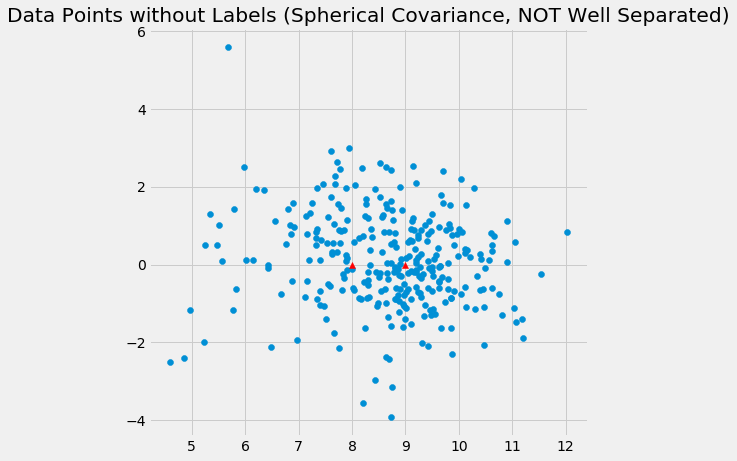

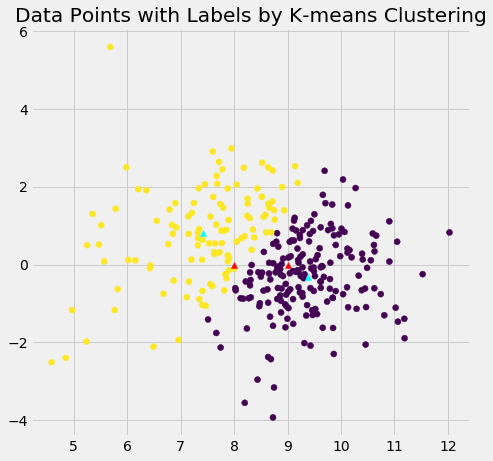

In [4]:
# generate data x with spherical covariance, NOT well separated
N = 300
mu1 = np.array([9,0])
sigma1 = np.array([[1, 0],[0, 1]])
mu2 = np.array([8, 0])
sigma2 = np.array([[2, 0], [0, 2]])
weights = [0.6, 0.4]


np.random.seed(1) #For reproducibility
r1 = np.random.multivariate_normal(mu1, sigma1,int(weights[0]*N))
r2 = np.random.multivariate_normal(mu2, sigma2,int(weights[1]*N))

X = np.vstack((r1,r2)) #Cascade data points
np.random.shuffle(X)

plt.style.use('fivethirtyeight')
plt.figure(figsize=(7, 7))
plt.scatter(X[:,0], X[:,1])
plt.scatter(mu1[0],mu1[1], marker='^', c='red')
plt.scatter(mu2[0],mu2[1], marker='^', c='red')
plt.title('Data Points without Labels (Spherical Covariance, NOT Well Separated)')
plt.show()

kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

plt.figure(figsize=(7, 7))
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_.astype(float))
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], marker='^', c='cyan')
# uncomment below to plot the mean values from each distribution
plt.scatter(mu1[0],mu1[1], marker='^', c='red')
plt.scatter(mu2[0],mu2[1], marker='^', c='red')

plt.title('Data Points with Labels by K-means Clustering')
plt.show()


In [5]:
# initialization

w = np.array([0.5, 0.5])
u1 = np.array(kmeans.cluster_centers_[0])
u2 = np.array(kmeans.cluster_centers_[1])
cov1 = np.eye(2)          
cov2 = np.eye(2)
L_before = 0
gamma1 = np.empty(300)
gamma2 = np.empty(300)
gamma1_x_sum = np.empty(300)
gamma2_x_sum = np.empty(300)

for k in range(0,N):
    L_before += (np.log(w[0]*multivariate_normal.pdf(X[k], u1, cov1)) \
                +np.log(w[1]*multivariate_normal.pdf(X[k], u2, cov2) ) )

L_before = L_before / N
L_after = 0
iterations = 0
threshold = 1e-4

while np.abs(L_after - L_before) > threshold :
    
    iterations += 1
    L_before = L_after
    #for loop in range(0,5):   
    # E Step
    for i in range(0,N):
        gamma1[i] = (w[0]*multivariate_normal.pdf(X[i], u1, cov1)) / \
        (w[0]*multivariate_normal.pdf(X[i], u1, cov1) + w[1]*multivariate_normal.pdf(X[i], u2, cov2))
        
        
        gamma2[i] = (w[1]*multivariate_normal.pdf(X[i], u2, cov2)) / \
        (w[0]*multivariate_normal.pdf(X[i], u1, cov1) + w[1]*multivariate_normal.pdf(X[i], u2, cov2))

    # Now, M Step
    u1_num = 0
    u2_num = 0
    for j in range(0,N):
        u1_num = u1_num + gamma1[j]*X[j]
        u2_num = u2_num + gamma2[j]*X[j]
    
    u1 = u1_num / np.sum(gamma1)
    u2 = u2_num / np.sum(gamma2)
    
    cov1_num = np.zeros([2,2])
    cov2_num = np.zeros([2,2])
    
    for k in range(0,N):
        cov1_num = cov1_num + gamma1[k]*( np.reshape(X[k], (-1,1)) - np.reshape(u1, (-1,1)) )*(X[k] - u1)
        cov2_num = cov2_num + gamma2[k]*( np.reshape(X[k], (-1,1)) - np.reshape(u2, (-1,1)) )*(X[k] - u2)

    cov1 = cov1_num / np.sum(gamma1)
    cov2 = cov2_num / np.sum(gamma2)
    
    w[0] = np.sum(gamma1)/N
    w[1] = np.sum(gamma2)/N
    
    L_after = 0
    for l in range(0,N):
        L_after = L_after + (np.log(w[0]*multivariate_normal.pdf(X[l], u1, cov1)) \
            +np.log(w[1]*multivariate_normal.pdf(X[l], u2, cov2) ) )
    L_after = L_after / N
print("NOT Well Separated, Spherical Covariance \n")
print("Number of Iterations: ", str(iterations))
print("Theoretical mu1: ", str(mu1))
print("Estimated mu1: ", str(u1))       
print("\n")
print("Theoretical mu2: ", str(mu2))
print("Estimated mu2: ", str(u2))   
print("\n")
print("Theoretical w1: ", str(weights[0]))
print("Estimated w1: ", str(w[0]))       
print("\n")
print("Theoretical w2: ", str(weights[1]))
print("Estimated w2: ", str(w[1])) 
print("Theoretical sigma1:\n", str(sigma1))
print("Estimated sigma1:\n", str(cov1))       
print("\n")
print("Theoretical sigma2:\n", str(sigma2))
print("Estimated sigma2:\n", str(cov2))  
   

NOT Well Separated, Spherical Covariance 

Number of Iterations:  215
Theoretical mu1:  [9 0]
Estimated mu1:  [8.97012115 0.1410203 ]


Theoretical mu2:  [8 0]
Estimated mu2:  [ 7.11183783 -0.07362771]


Theoretical w1:  0.6
Estimated w1:  0.8288604005522126


Theoretical w2:  0.4
Estimated w2:  0.17113959944778748
Theoretical sigma1:
 [[1 0]
 [0 1]]
Estimated sigma1:
 [[ 1.05215593 -0.25584767]
 [-0.25584767  1.15537897]]


Theoretical sigma2:
 [[2 0]
 [0 2]]
Estimated sigma2:
 [[ 1.78498279 -0.29147058]
 [-0.29147058  3.22675984]]


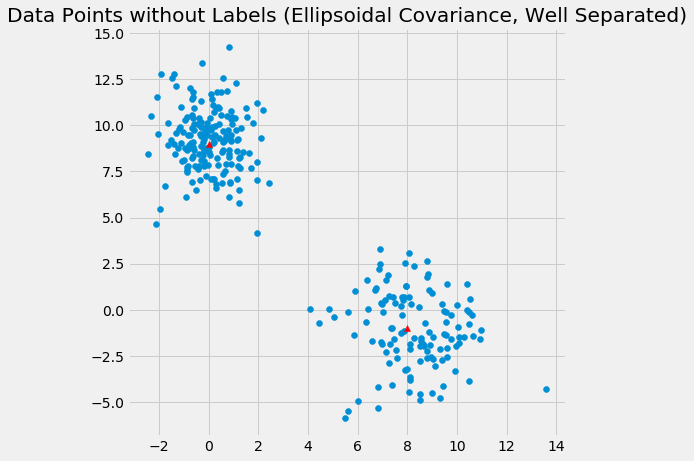

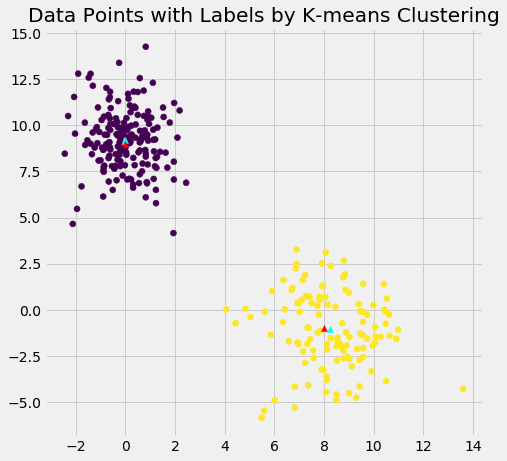

In [6]:
# generate data x with Ellipsoidal covariance, well separated
N = 300
mu1 = np.array([0,9])
sigma1 = np.array([[1, 0],[0, 3]])
mu2 = np.array([8, -1])
sigma2 = np.array([[2, 0], [0, 4]])
weights = [0.6, 0.4]


np.random.seed(1) #For reproducibility
r1 = np.random.multivariate_normal(mu1, sigma1,int(weights[0]*N))
r2 = np.random.multivariate_normal(mu2, sigma2,int(weights[1]*N))

X = np.vstack((r1,r2)) #Cascade data points
np.random.shuffle(X)

plt.style.use('fivethirtyeight')
plt.figure(figsize=(7, 7))
plt.scatter(X[:,0], X[:,1])
plt.scatter(mu1[0],mu1[1], marker='^', c='red')
plt.scatter(mu2[0],mu2[1], marker='^', c='red')
plt.title('Data Points without Labels (Ellipsoidal Covariance, Well Separated)')
plt.show()

kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

plt.figure(figsize=(7, 7))
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_.astype(float))
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], marker='^', c='cyan')
# uncomment below to plot the mean values from each distribution
plt.scatter(mu1[0],mu1[1], marker='^', c='red')
plt.scatter(mu2[0],mu2[1], marker='^', c='red')

plt.title('Data Points with Labels by K-means Clustering')
plt.show()


In [7]:
# initialization

w = np.array([0.5, 0.5])
u1 = np.array(kmeans.cluster_centers_[0])
u2 = np.array(kmeans.cluster_centers_[1])
cov1 = np.eye(2)          
cov2 = np.eye(2)
L_before = 0
gamma1 = np.empty(300)
gamma2 = np.empty(300)
gamma1_x_sum = np.empty(300)
gamma2_x_sum = np.empty(300)

for k in range(0,N):
    L_before += (np.log(w[0]*multivariate_normal.pdf(X[k], u1, cov1)) \
                +np.log(w[1]*multivariate_normal.pdf(X[k], u2, cov2) ) )

L_before = L_before / N
L_after = 0
iterations = 0
threshold = 1e-4

while np.abs(L_after - L_before) > threshold :
    
    iterations += 1
    L_before = L_after
    #for loop in range(0,5):   
    # E Step
    for i in range(0,N):
        gamma1[i] = (w[0]*multivariate_normal.pdf(X[i], u1, cov1)) / \
        (w[0]*multivariate_normal.pdf(X[i], u1, cov1) + w[1]*multivariate_normal.pdf(X[i], u2, cov2))
        
        
        gamma2[i] = (w[1]*multivariate_normal.pdf(X[i], u2, cov2)) / \
        (w[0]*multivariate_normal.pdf(X[i], u1, cov1) + w[1]*multivariate_normal.pdf(X[i], u2, cov2))

    # Now, M Step
    u1_num = 0
    u2_num = 0
    for j in range(0,N):
        u1_num = u1_num + gamma1[j]*X[j]
        u2_num = u2_num + gamma2[j]*X[j]
    
    u1 = u1_num / np.sum(gamma1)
    u2 = u2_num / np.sum(gamma2)
    
    cov1_num = np.zeros([2,2])
    cov2_num = np.zeros([2,2])
    
    for k in range(0,N):
        cov1_num = cov1_num + gamma1[k]*( np.reshape(X[k], (-1,1)) - np.reshape(u1, (-1,1)) )*(X[k] - u1)
        cov2_num = cov2_num + gamma2[k]*( np.reshape(X[k], (-1,1)) - np.reshape(u2, (-1,1)) )*(X[k] - u2)

    cov1 = cov1_num / np.sum(gamma1)
    cov2 = cov2_num / np.sum(gamma2)
    
    w[0] = np.sum(gamma1)/N
    w[1] = np.sum(gamma2)/N
    
    L_after = 0
    for l in range(0,N):
        L_after = L_after + (np.log(w[0]*multivariate_normal.pdf(X[l], u1, cov1)) \
            +np.log(w[1]*multivariate_normal.pdf(X[l], u2, cov2) ) )
    L_after = L_after / N
print("Well Separated, Ellipsoidal Covariance \n")
print("Number of Iterations: ", str(iterations))
print("Theoretical mu1: ", str(mu1))
print("Estimated mu1: ", str(u1))       
print("\n")
print("Theoretical mu2: ", str(mu2))
print("Estimated mu2: ", str(u2))   
print("\n")
print("Theoretical w1: ", str(weights[0]))
print("Estimated w1: ", str(w[0]))       
print("\n")
print("Theoretical w2: ", str(weights[1]))
print("Estimated w2: ", str(w[1])) 
print("Theoretical sigma1:\n", str(sigma1))
print("Estimated sigma1:\n", str(cov1))       
print("\n")
print("Theoretical sigma2:\n", str(sigma2))
print("Estimated sigma2:\n", str(cov2))  
   

Well Separated, Ellipsoidal Covariance 

Number of Iterations:  3
Theoretical mu1:  [0 9]
Estimated mu1:  [7.08273264e-03 9.18830163e+00]


Theoretical mu2:  [ 8 -1]
Estimated mu2:  [ 8.24985772 -1.04617458]


Theoretical w1:  0.6
Estimated w1:  0.5999887417579609


Theoretical w2:  0.4
Estimated w2:  0.40001125824203915
Theoretical sigma1:
 [[1 0]
 [0 3]]
Estimated sigma1:
 [[ 0.94328577 -0.13419994]
 [-0.13419994  2.69259741]]


Theoretical sigma2:
 [[2 0]
 [0 4]]
Estimated sigma2:
 [[ 2.34166692 -0.32713789]
 [-0.32713789  4.08130846]]


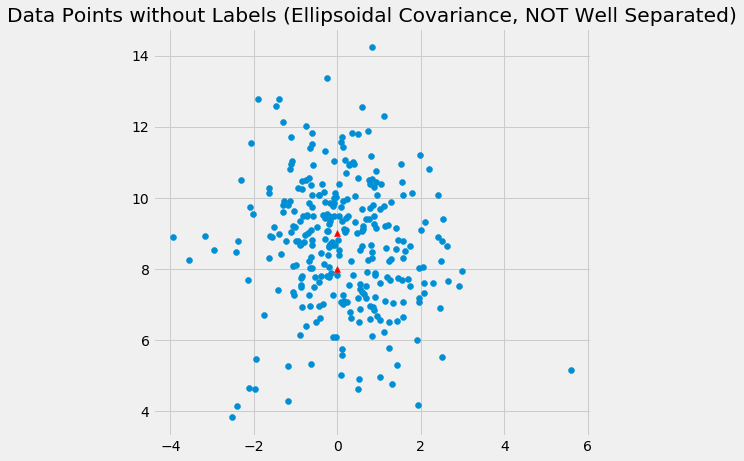

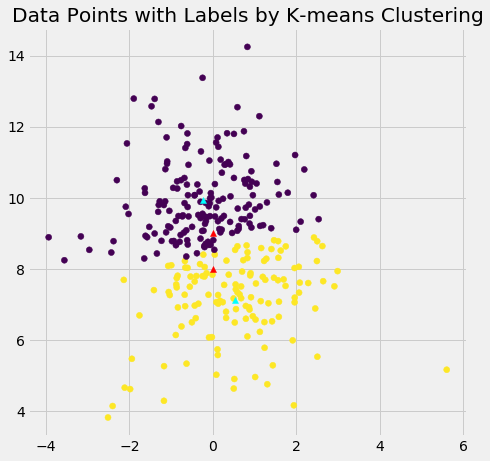

In [8]:
# generate data x with Ellipsoidal covariance, NOT well separated
N = 300
mu1 = np.array([0,9])
sigma1 = np.array([[1, 0],[0, 3]])
mu2 = np.array([0, 8])
sigma2 = np.array([[2, 0], [0, 3]])
weights = [0.6, 0.4]


np.random.seed(1) #For reproducibility
r1 = np.random.multivariate_normal(mu1, sigma1,int(weights[0]*N))
r2 = np.random.multivariate_normal(mu2, sigma2,int(weights[1]*N))

X = np.vstack((r1,r2)) #Cascade data points
np.random.shuffle(X)

plt.style.use('fivethirtyeight')
plt.figure(figsize=(7, 7))
plt.scatter(X[:,0], X[:,1])
plt.scatter(mu1[0],mu1[1], marker='^', c='red')
plt.scatter(mu2[0],mu2[1], marker='^', c='red')
plt.title('Data Points without Labels (Ellipsoidal Covariance, NOT Well Separated)')
plt.show()

kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

plt.figure(figsize=(7, 7))
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_.astype(float))
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], marker='^', c='cyan')
# uncomment below to plot the mean values from each distribution
plt.scatter(mu1[0],mu1[1], marker='^', c='red')
plt.scatter(mu2[0],mu2[1], marker='^', c='red')

plt.title('Data Points with Labels by K-means Clustering')
plt.show()


In [9]:
# initialization

w = np.array([0.5, 0.5])
u1 = np.array(kmeans.cluster_centers_[0])
u2 = np.array(kmeans.cluster_centers_[1])
cov1 = np.eye(2)          
cov2 = np.eye(2)
L_before = 0
gamma1 = np.empty(300)
gamma2 = np.empty(300)
gamma1_x_sum = np.empty(300)
gamma2_x_sum = np.empty(300)

for k in range(0,N):
    L_before += (np.log(w[0]*multivariate_normal.pdf(X[k], u1, cov1)) \
                +np.log(w[1]*multivariate_normal.pdf(X[k], u2, cov2) ) )

L_before = L_before / N
L_after = 0
iterations = 0
threshold = 1e-4

while np.abs(L_after - L_before) > threshold :
    
    iterations += 1
    L_before = L_after
    #for loop in range(0,5):   
    # E Step
    for i in range(0,N):
        gamma1[i] = (w[0]*multivariate_normal.pdf(X[i], u1, cov1)) / \
        (w[0]*multivariate_normal.pdf(X[i], u1, cov1) + w[1]*multivariate_normal.pdf(X[i], u2, cov2))
        
        
        gamma2[i] = (w[1]*multivariate_normal.pdf(X[i], u2, cov2)) / \
        (w[0]*multivariate_normal.pdf(X[i], u1, cov1) + w[1]*multivariate_normal.pdf(X[i], u2, cov2))

    # Now, M Step
    u1_num = 0
    u2_num = 0
    for j in range(0,N):
        u1_num = u1_num + gamma1[j]*X[j]
        u2_num = u2_num + gamma2[j]*X[j]
    
    u1 = u1_num / np.sum(gamma1)
    u2 = u2_num / np.sum(gamma2)
    
    cov1_num = np.zeros([2,2])
    cov2_num = np.zeros([2,2])
    
    for k in range(0,N):
        cov1_num = cov1_num + gamma1[k]*( np.reshape(X[k], (-1,1)) - np.reshape(u1, (-1,1)) )*(X[k] - u1)
        cov2_num = cov2_num + gamma2[k]*( np.reshape(X[k], (-1,1)) - np.reshape(u2, (-1,1)) )*(X[k] - u2)

    cov1 = cov1_num / np.sum(gamma1)
    cov2 = cov2_num / np.sum(gamma2)
    
    w[0] = np.sum(gamma1)/N
    w[1] = np.sum(gamma2)/N
    
    L_after = 0
    for l in range(0,N):
        L_after = L_after + (np.log(w[0]*multivariate_normal.pdf(X[l], u1, cov1)) \
            +np.log(w[1]*multivariate_normal.pdf(X[l], u2, cov2) ) )
    L_after = L_after / N
print("NOT Well Separated, Ellipsoidal Covariance \n")
print("Number of Iterations: ", str(iterations))
print("Theoretical mu1: ", str(mu1))
print("Estimated mu1: ", str(u1))       
print("\n")
print("Theoretical mu2: ", str(mu2))
print("Estimated mu2: ", str(u2))   
print("\n")
print("Theoretical w1: ", str(weights[0]))
print("Estimated w1: ", str(w[0]))       
print("\n")
print("Theoretical w2: ", str(weights[1]))
print("Estimated w2: ", str(w[1])) 
print("Theoretical sigma1:\n", str(sigma1))
print("Estimated sigma1:\n", str(cov1))       
print("\n")
print("Theoretical sigma2:\n", str(sigma2))
print("Estimated sigma2:\n", str(cov2))  
   

NOT Well Separated, Ellipsoidal Covariance 

Number of Iterations:  219
Theoretical mu1:  [0 9]
Estimated mu1:  [0.15675725 8.92628756]


Theoretical mu2:  [0 8]
Estimated mu2:  [-0.32693826  6.81154404]


Theoretical w1:  0.6
Estimated w1:  0.8915191086329253


Theoretical w2:  0.4
Estimated w2:  0.1084808913670746
Theoretical sigma1:
 [[1 0]
 [0 3]]
Estimated sigma1:
 [[ 1.17838537 -0.37383135]
 [-0.37383135  2.71127256]]


Theoretical sigma2:
 [[2 0]
 [0 3]]
Estimated sigma2:
 [[ 4.0857862  -0.28477588]
 [-0.28477588  3.24894691]]


### Question 3 Analysis

- For this question I tested 4 different scenarios
- The first scenario is where the two components of the mixture model have spherical variance, and are very well separated.
    - In this case, it takes three iterations for the difference between the log likelihood to go below the threshold, and the mean, weights, and covariance predictions are fairly accurate.
- The second scenario also has spherical covariance, but the data is not well separated. 
     - In this case, it takes 215 iterations to go below the threshold. The weights are not predicted well, and the means and covariances aren't as accurate either.
- The third scenario is where the two components of the mixture model have ellipsoidal variance, and are very well separated.
    - In this case, it takes three iterations for the difference between the log likelihood to go below the threshold, and the mean, weights, and covariance predictions are fairly accurate.
- The fourth scenario also has ellipsoidal covariance, but the data is not well separated. 
     - In this case, it takes 219 iterations to go below the threshold. The weights are not predicted well, and the means and covariances aren't as accurate either.
